In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
X=np.load('X_val.npy')
y=np.load('y_val.npy')

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data\\model")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data\\model'

In [4]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [9]:
from keras import layers, models
from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

    
model=load_model('VGG16_transfer learning_1.h5',compile=False)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), 
              metrics=['acc',tf.keras.metrics.AUC(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),f1score])
    
    
_loss, _acc, _auc, _precision, _recall, _f1score = model.evaluate(X, y, batch_size=32)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

343/343 [==============================] - 17s 48ms/step
loss: 2.021, accuracy: 0.586, auc: 0.813, precision: 0.568, recall: 0.558, f1score: 0.155


In [10]:
predict = model.predict_classes(X)
y_val_origin=np.argmax(y,axis=1)
#calc_benign, calc_malignant, mass_benign, mass_malignant

In [40]:
import sklearn

matrix = sklearn.metrics.confusion_matrix(y.argmax(axis=1), predict)

matrix

array([[51, 25,  1,  2],
       [21, 50,  1,  7],
       [ 1,  1, 53, 47],
       [ 1,  0, 35, 47]], dtype=int64)

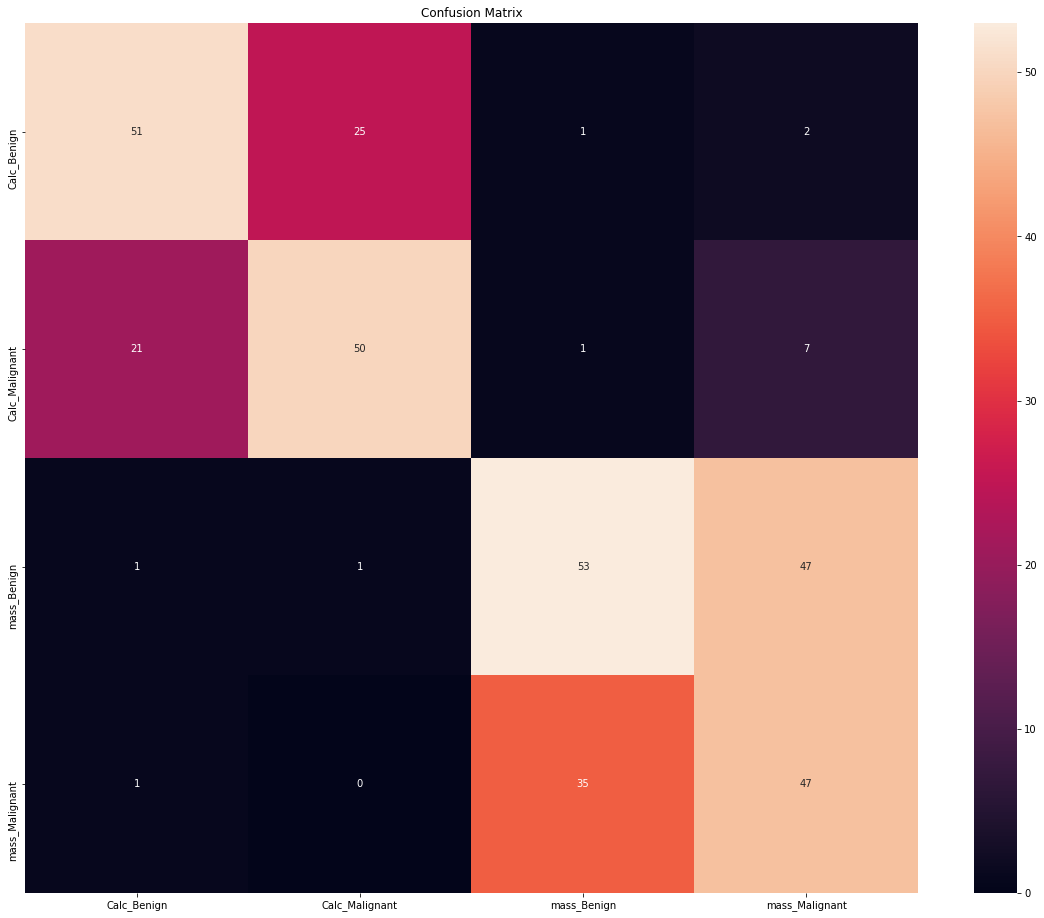

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


index = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
columns = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
cm_df = pd.DataFrame(matrix,columns,index)                      
plt.figure(figsize=(20,16)) 
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True)